In [71]:
import numpy as np
import pandas as pd
import glob  # for finding all CSV files automatically

In [72]:
# Map the different names to "subject"
column_map = {
    "subject": ["title", "Title", "Name", "Department_Name", "Subject"],
    "label": ["label", "Label"]  # optional, if some files already have labels
}

In [73]:
def load_and_clean_csv(path, column_map):
    df = pd.read_csv(path, encoding="ISO-8859-1")
    rename_dict = {}

    # Match possible column names
    for final_name, possible_names in column_map.items():
        for name in possible_names:
            if name in df.columns:
                rename_dict[name] = final_name
                break
    
    # Rename columns
    df = df.rename(columns=rename_dict)
    
    # Only keep needed columns
    df = df[list(rename_dict.values())]
    
    return df


In [74]:
df3 = load_and_clean_csv("datasets/data3.csv", column_map)  # BEST dataset
df4 = load_and_clean_csv("datasets/data4.csv", column_map)
df5 = load_and_clean_csv("datasets/data5.csv", column_map)

In [75]:
merged = pd.concat([df3, df4, df5], ignore_index=True)

In [76]:
merged = merged[merged["subject"].notna()]

In [77]:
print("Final dataset shape:", merged.shape)
merged.head()

Final dataset shape: (134880, 1)


,subject
0,Intro Asian American Studies
1,Intro Asian American Studies
2,Intro Asian American Studies
3,Intro Asian American Studies
4,Intro Asian American Studies


In [78]:
# Add default label = 1 (valid)
if "label" not in merged.columns:
    merged["label"] = 1

In [79]:
merged.head()

,subject,label
0,Intro Asian American Studies,1
1,Intro Asian American Studies,1
2,Intro Asian American Studies,1
3,Intro Asian American Studies,1
4,Intro Asian American Studies,1


In [80]:
df = merged.copy()

In [81]:
df.head()

,subject,label
0,Intro Asian American Studies,1
1,Intro Asian American Studies,1
2,Intro Asian American Studies,1
3,Intro Asian American Studies,1
4,Intro Asian American Studies,1


In [82]:
df.shape

(134880, 2)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134880 entries, 0 to 134879
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   subject  134880 non-null  object
 1   label    134880 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.1+ MB


In [84]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [85]:
df.duplicated().sum()
df = df.drop_duplicates(keep='first')

In [86]:
df.duplicated().sum()

np.int64(0)

In [87]:
df.shape

(3597, 2)

In [88]:
df['label'].value_counts()

label
1    3597
Name: count, dtype: int64

In [103]:
import random
import string
import pandas as pd

# Make a random fake word
def random_word(length=5):
    return ''.join(random.choices(string.ascii_lowercase, k=length))

# Make a random subject with 1–5 words
def random_subject():
    num_words = random.randint(1, 5)  # subjects can have 1 to 5 words
    return ' '.join(random_word(random.randint(2, 8)) for _ in range(num_words))

# Generate 70k invalid subjects
spam_subjects = [random_subject() for _ in range(1500)]

# Add some common spammy patterns
extra_spam = [
    "test", "sample data", "hello world", "ok", "xyz",
    "12345", "qwerty asdf", "lorem ipsum", "blah blah blah",
    "0000", "??? ???", "xxx yyy zzz"
] * 80  # repeat to bulk up

# Combine into dataframe
df_spam = pd.DataFrame({
    "subject": spam_subjects + extra_spam,
    "label": 0
})


In [104]:
df_spam.shape

(2460, 2)

In [105]:
df_spam.head()

,subject,label
0,nbhrbkmj yqok rwp qart,0
1,os nzz mn,0
2,cnkoycq xntu dr tnf bgwughi,0
3,rjqev,0
4,ft lbzugys cwi,0


In [106]:
def random_string(length=6):
    return ''.join(random.choices(string.ascii_lowercase, k=length))
spam_subjects = [random_string(random.randint(4,10)) for _ in range(1000)]  # ~70k fake subjects
df_spam_one_word = pd.DataFrame({"subject": spam_subjects, "label": 0})

In [107]:
df_final = pd.concat([df, df_spam, df_spam_one_word], ignore_index=True)

In [108]:
df_final.shape

(7057, 2)

In [109]:
df_final['label'].value_counts()

label
1    3597
0    3460
Name: count, dtype: int64

In [110]:
df_final = df_final.drop_duplicates(keep='first')

In [111]:
shuffled_df = df_final.sample(frac=1).reset_index(drop=True)

In [112]:
shuffled_df.head()

,subject,label
0,hjcyjbnxc,0
1,qfje saesjgkn zae bxicnp,0
2,ocdwdryt,0
3,Off-Campus Internship,1
4,Curr Design &amp; Instruction,1


In [113]:
shuffled_df.to_csv("datasets/subjects_final.csv", index=False)

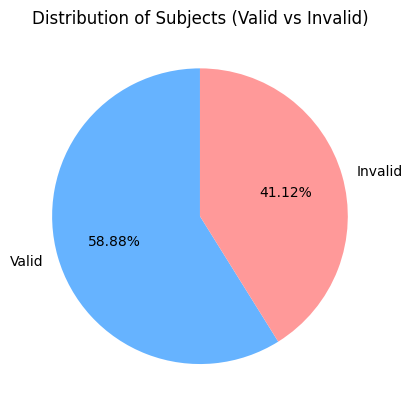

In [114]:
import matplotlib.pyplot as plt

# Count labels
counts = shuffled_df['label'].value_counts()

# Map labels to names
labels = ['Valid', 'Invalid'] if 1 in counts.index else counts.index

# Plot
plt.pie(counts, labels=labels, autopct="%0.2f%%", startangle=90, colors=["#66b3ff", "#ff9999"])
plt.title("Distribution of Subjects (Valid vs Invalid)")
plt.show()


In [115]:
# If you want to clean and keep everything aligned
shuffled_df['subject'] = shuffled_df['subject'].astype(str).str.strip()

# Then calculate number of characters
shuffled_df['num_characters'] = shuffled_df['subject'].apply(len)

# Optional: number of words
import nltk
nltk.download('punkt')
shuffled_df['num_words'] = shuffled_df['subject'].apply(lambda x: len(nltk.word_tokenize(x)))


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ashishsigdel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [116]:
shuffled_df.head(20)

,subject,label,num_characters,num_words
0,hjcyjbnxc,0,9,1
1,qfje saesjgkn zae bxicnp,0,24,4
2,ocdwdryt,0,8,1
3,Off-Campus Internship,1,21,2
4,Curr Design &amp; Instruction,1,29,6
5,rxep,0,4,1
6,Orthopedic Sports Medicine,1,26,3
7,dzku,0,4,1
8,Intermediate Composition,1,24,2
9,Classical Political Theory,1,26,3


In [117]:
shuffled_df[shuffled_df['label'] == 0][['num_characters', 'num_words']].describe()

,num_characters,num_words
count,2512.000000,2512.000000
mean,12.970541,2.204220
std,8.782740,1.480019
min,2.000000,1.000000
25%,6.000000,1.000000
50%,9.000000,1.000000
75%,19.000000,3.000000
max,41.000000,6.000000


In [118]:
shuffled_df[shuffled_df['label'] == 1][['num_characters', 'num_words']].describe()

,num_characters,num_words
count,3597.000000,3597.000000
mean,27.185710,3.839589
std,10.631296,1.869226
min,4.000000,1.000000
25%,21.000000,3.000000
50%,26.000000,3.000000
75%,30.000000,5.000000
max,99.000000,16.000000


In [119]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

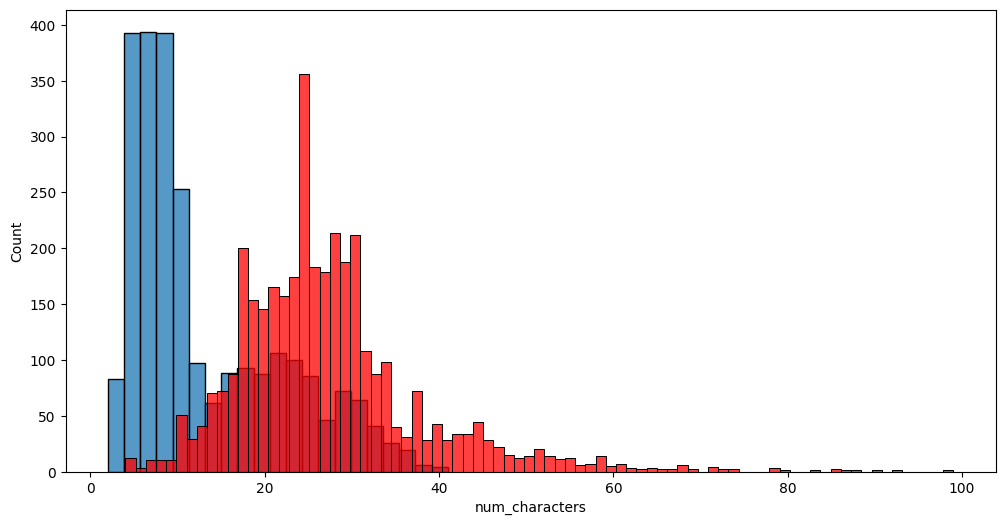

In [120]:
plt.figure(figsize=(12,6))
sns.histplot(shuffled_df[shuffled_df['label'] == 0]['num_characters'])
sns.histplot(shuffled_df[shuffled_df['label'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

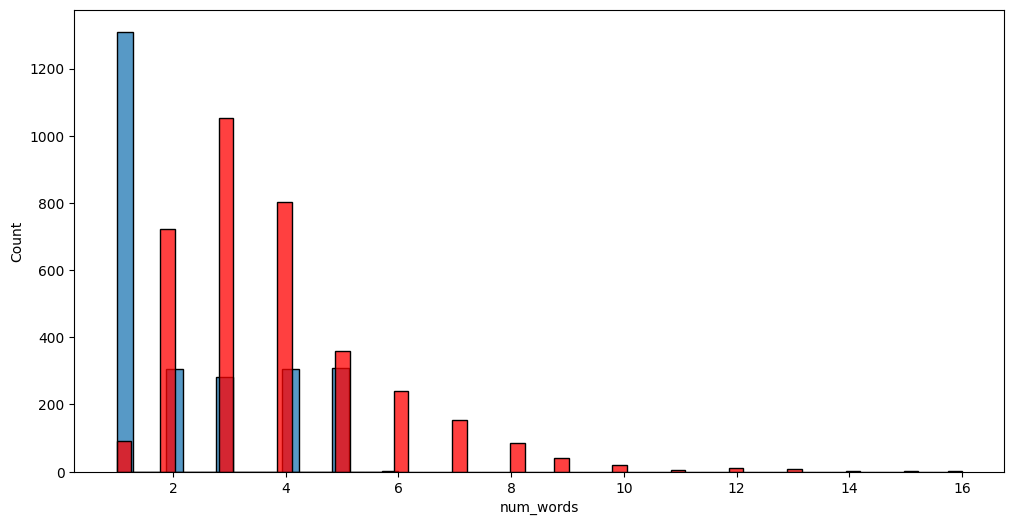

In [121]:
plt.figure(figsize=(12,6))
sns.histplot(shuffled_df[shuffled_df['label'] == 0]['num_words'])
sns.histplot(shuffled_df[shuffled_df['label'] == 1]['num_words'], color='red')

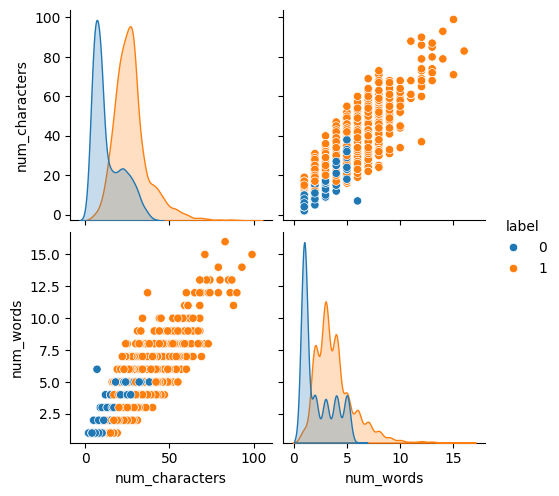

In [122]:
sns.pairplot(shuffled_df, hue='label')

<Axes: >

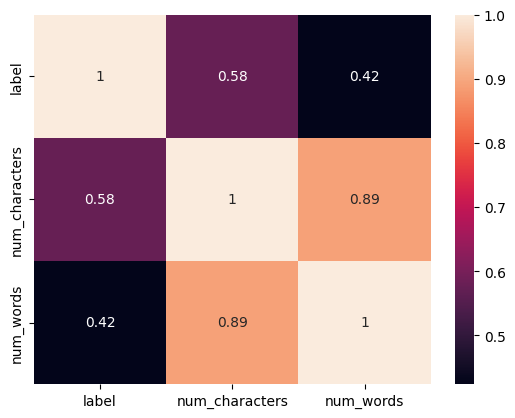

In [123]:
numeric_df = shuffled_df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True)

In [124]:
df = shuffled_df.copy()

### Preprocessing

In [125]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashishsigdel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [126]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [127]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ashishsigdel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashishsigdel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [128]:
from nltk.stem.porter import PorterStemmer

In [129]:
ps = PorterStemmer()
ps.stem('loving')

'love'

In [130]:
def transform_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize the text
    text = nltk.word_tokenize(text)

    y = []
    # Remove non-alphanumeric tokens
    for i in text:
        if i.isalnum():
            y.append(i)

    # Remove stopwords and punctuation
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: 
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [131]:
print(transform_text("deep learning"))
print(transform_text("A Practical Example of Machine Learning"))
print(transform_text("Operating Systems"))
print(transform_text("Biology"))
print(transform_text("sdjflksfl"))

deep learn
practic exampl machin learn
oper system
biolog
sdjflksfl


In [132]:
df['subject'][1000]

'xue izez bn mte cqa'

In [133]:
df['transformed_subject'] = df['subject'].apply(transform_text)

In [134]:
df.head()

,subject,label,num_characters,num_words,transformed_subject
0,hjcyjbnxc,0,9,1,hjcyjbnxc
1,qfje saesjgkn zae bxicnp,0,24,4,qfje saesjgkn zae bxicnp
2,ocdwdryt,0,8,1,ocdwdryt
3,Off-Campus Internship,1,21,2,internship
4,Curr Design &amp; Instruction,1,29,6,curr design amp instruct


In [135]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [136]:
not_spam = wc.generate(df[df['label'] == 1]['transformed_subject'].str.cat(sep=" "))

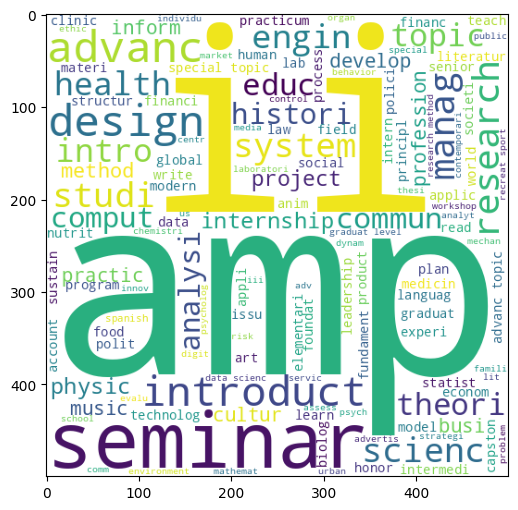

In [137]:
plt.figure(figsize=(15,6))
plt.imshow(not_spam)

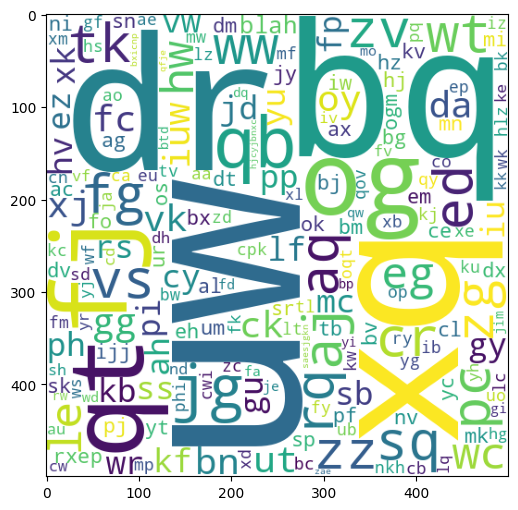

In [138]:
spam = wc.generate(df[df['label'] == 0]['transformed_subject'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam)

In [139]:
spam_corpus = []
for msg in df[df['label'] == 0]['transformed_subject'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [140]:
len(spam_corpus)

5510

In [141]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('uw', 5),
 ('bq', 5),
 ('dr', 5),
 ('xq', 5),
 ('og', 4),
 ('fj', 4),
 ('qt', 4),
 ('qb', 4),
 ('jg', 4),
 ('ww', 3),
 ('fg', 3),
 ('zz', 3),
 ('tk', 3),
 ('zv', 3),
 ('sq', 3),
 ('rq', 3),
 ('ed', 3),
 ('aj', 3),
 ('vs', 3),
 ('pc', 3),
 ('aq', 3),
 ('wt', 3),
 ('zg', 3),
 ('cr', 3),
 ('eg', 3),
 ('hw', 3),
 ('le', 3),
 ('wc', 3),
 ('xj', 3),
 ('gg', 3)]

In [142]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,uw,5
1,bq,5
2,dr,5
3,xq,5
4,og,4
5,fj,4
6,qt,4
7,qb,4
8,jg,4
9,ww,3


<Axes: xlabel='word', ylabel='count'>

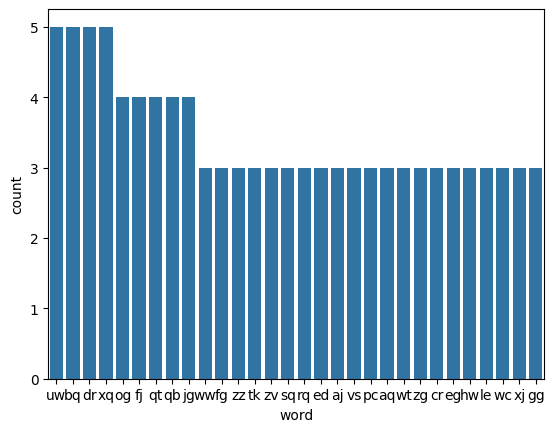

In [143]:
data = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=data)

In [144]:
nospam_corpus = []
for msg in df[df['label'] == 1]['transformed_subject'].tolist():
    for word in msg.split():
        nospam_corpus.append(word)

<Axes: xlabel='word', ylabel='count'>

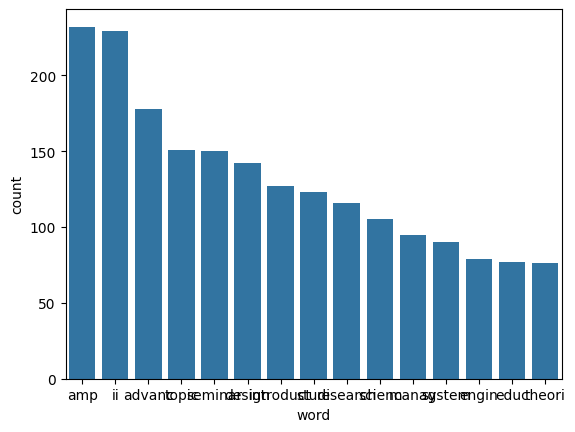

In [145]:
data = pd.DataFrame(Counter(nospam_corpus).most_common(15), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=data)

### Model Building

In [146]:
df.head(20)

,subject,label,num_characters,num_words,transformed_subject
0,hjcyjbnxc,0,9,1,hjcyjbnxc
1,qfje saesjgkn zae bxicnp,0,24,4,qfje saesjgkn zae bxicnp
2,ocdwdryt,0,8,1,ocdwdryt
3,Off-Campus Internship,1,21,2,internship
4,Curr Design &amp; Instruction,1,29,6,curr design amp instruct
5,rxep,0,4,1,rxep
6,Orthopedic Sports Medicine,1,26,3,orthoped sport medicin
7,dzku,0,4,1,dzku
8,Intermediate Composition,1,24,2,intermedi composit
9,Classical Political Theory,1,26,3,classic polit theori


In [147]:
from sklearn.model_selection import train_test_split
X = df['transformed_subject']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=3000, ngram_range=(1,2))),
    ('classifier', LogisticRegression())
])

In [151]:
pipeline.fit(X_train, y_train)

,steps,"[('tfidf', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [152]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]  # probability for positive class

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))


Accuracy: 0.9631751227495908
ROC AUC: 0.989501715360779

Confusion matrix:
 [[501   1]
 [ 44 676]]

Classification report:
               precision    recall  f1-score   support

           0     0.9193    0.9980    0.9570       502
           1     0.9985    0.9389    0.9678       720

    accuracy                         0.9632      1222
   macro avg     0.9589    0.9684    0.9624      1222
weighted avg     0.9660    0.9632    0.9634      1222



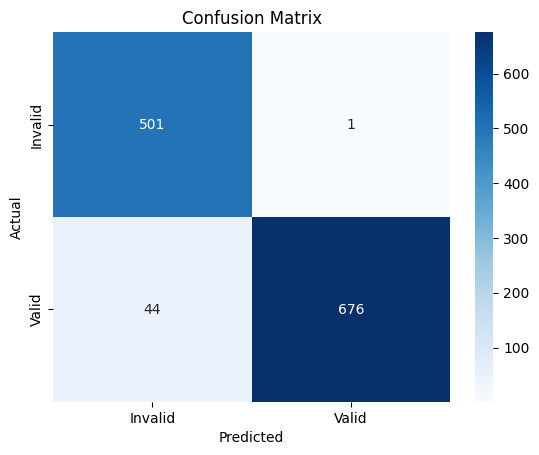

In [153]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Invalid", "Valid"],
            yticklabels=["Invalid", "Valid"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [154]:
# Example subjects you want to test
sample_subjects = [
    "Introduction to Machine Learning",
    "skfjskfjs kjfkjsf",  # gibberish
    "Data Structures and Algorithms",
    "qwerty 123 test",
    "Digital Logic Design"
    "ksjfljw",
    "Operating Systems",
    "Digital Signal Processing and Analysis",
    "zsdf"
]

predictions = pipeline.predict(sample_subjects)
probabilities = pipeline.predict_proba(sample_subjects)[:, 1]

for subj, pred, prob in zip(sample_subjects, predictions, probabilities):
    print(f"Subject: {subj}")
    print(f"Predicted Label: {'Valid ✅' if pred==1 else 'Spam ❌'}")
    print(f"Probability of being VALID: {prob:.4f}")
    print("-" * 40)


Subject: Introduction to Machine Learning
Predicted Label: Spam ❌
Probability of being VALID: 0.3130
----------------------------------------
Subject: skfjskfjs kjfkjsf
Predicted Label: Spam ❌
Probability of being VALID: 0.3130
----------------------------------------
Subject: Data Structures and Algorithms
Predicted Label: Valid ✅
Probability of being VALID: 0.7109
----------------------------------------
Subject: qwerty 123 test
Predicted Label: Spam ❌
Probability of being VALID: 0.3150
----------------------------------------
Subject: Digital Logic Designksjfljw
Predicted Label: Valid ✅
Probability of being VALID: 0.5446
----------------------------------------
Subject: Operating Systems
Predicted Label: Spam ❌
Probability of being VALID: 0.3130
----------------------------------------
Subject: Digital Signal Processing and Analysis
Predicted Label: Spam ❌
Probability of being VALID: 0.4924
----------------------------------------
Subject: zsdf
Predicted Label: Spam ❌
Probability of

In [155]:
import skl2onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import StringTensorType

# Define input type (string, shape: [None, 1])
initial_type = [('input', StringTensorType([None]))]

onnx_model = convert_sklearn(pipeline, initial_types=initial_type)

# Save to file
with open("subject_spam_light_detector.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

print("✅ Model saved as subject_spam_detector.onnx")


✅ Model saved as subject_spam_detector.onnx


In [156]:
# Analyze feature importance in your current model
feature_names = pipeline.named_steps['tfidf'].get_feature_names_out()
coefficients = pipeline.named_steps['classifier'].coef_[0]
spam_features = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients
}).sort_values('coefficient').head(20)

print("Top 20 features that predict SPAM:")
print(spam_features)

Top 20 features that predict SPAM:
     feature  coefficient
2985      xq    -0.744036
620       fj    -0.680814
2922      uw    -0.669264
215       bq    -0.636499
2942      vs    -0.603986
899       jd    -0.603986
912       kf    -0.603986
2212      qt    -0.602759
2943      vw    -0.565232
1670      pc    -0.565232
902       jg    -0.559795
497       eg    -0.550030
2921      ut    -0.548994
2029      qb    -0.547116
955       lf    -0.547113
2642      rq    -0.547113
580       ez    -0.547113
471       dr    -0.540824
133       aq    -0.492204
2859      tk    -0.488158


In [157]:
# Top features pushing toward VALID (positive coefficients)
valid_features = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients
}).sort_values('coefficient', ascending=False).head(20)

print("\nTop 20 features that predict VALID:")
print(valid_features)


Top 20 features that predict VALID:
         feature  coefficient
772           ii     5.182515
78           amp     4.971625
32        advanc     4.283622
2680     seminar     4.103753
416       design     4.097245
864    introduct     4.075748
2784       studi     3.829005
2471    research     3.584466
988        manag     3.547173
2862       topic     3.478652
2819      system     3.349199
526        engin     3.085933
2663      scienc     3.066857
846   internship     3.052851
2848      theori     3.035645
854        intro     3.031922
107      analysi     2.802076
318       commun     2.775680
717       health     2.759884
489         educ     2.747875


In [158]:
# Debug "Introduction to Machine Learning"
sample_text = "Introduction to Machine Learning"
sample_vector = pipeline.named_steps['tfidf'].transform([sample_text])
prediction = pipeline.predict([sample_text])[0]
probability = pipeline.predict_proba([sample_text])[0]

print(f"\nDebugging: '{sample_text}'")
print(f"Prediction: {prediction} ({'SPAM' if prediction == 0 else 'VALID'})")
print(f"Probabilities: [SPAM: {probability[0]:.4f}, VALID: {probability[1]:.4f}]")


Debugging: 'Introduction to Machine Learning'
Prediction: 0 (SPAM)
Probabilities: [SPAM: 0.6870, VALID: 0.3130]


In [159]:
# Show which n-grams are present
active_features = []
feature_indices = sample_vector.nonzero()[1]
for idx in feature_indices:
    feature_name = feature_names[idx]
    tfidf_score = sample_vector[0, idx]
    coef = coefficients[idx]
    contribution = tfidf_score * coef
    active_features.append((feature_name, tfidf_score, coef, contribution))

active_df = pd.DataFrame(active_features, columns=['ngram', 'tfidf', 'coefficient', 'contribution'])
active_df = active_df.sort_values('contribution')
print("\nActive n-grams and their contributions:")
print(active_df)


Active n-grams and their contributions:
Empty DataFrame
Columns: [ngram, tfidf, coefficient, contribution]
Index: []


In [160]:
class SpamFeatureExtractor(BaseEstimator, TransformerMixin):
    """Extract spam-specific features for large dataset"""
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        features = []
        for text in X:
            features.append(self._extract_features(str(text)))
        return np.array(features)
    
    def _extract_features(self, text):
        """Extract features optimized for spam detection"""
        text = text.lower().strip()
        words = text.split()
        
        # Character-level features
        char_count = len(text)
        alpha_count = sum(c.isalpha() for c in text)
        digit_count = sum(c.isdigit() for c in text)
        space_count = sum(c.isspace() for c in text)
        
        # Word-level features
        word_count = len(words)
        avg_word_len = np.mean([len(w) for w in words]) if words else 0
        
        # Spam indicators
        vowel_count = sum(c in 'aeiou' for c in text)
        consonant_streaks = self._max_consonant_streak(text)
        repeated_chars = self._max_repeated_chars(text)
        
        # Meaningful word detection
        common_words = {'the', 'and', 'of', 'to', 'a', 'in', 'for', 'is', 'on', 'with', 'as', 'by'}
        has_common_words = any(word in common_words for word in words)
        
        # Dictionary-like words (simple heuristic)
        likely_words = sum(1 for word in words if len(word) >= 3 and 
                          sum(c in 'aeiou' for c in word) / len(word) > 0.2)
        
        return [
            char_count,
            word_count,
            avg_word_len,
            alpha_count / char_count if char_count > 0 else 0,
            digit_count / char_count if char_count > 0 else 0,
            space_count / char_count if char_count > 0 else 0,
            vowel_count / char_count if char_count > 0 else 0,
            consonant_streaks,
            repeated_chars,
            int(has_common_words),
            likely_words / word_count if word_count > 0 else 0,
        ]
    
    def _max_consonant_streak(self, text):
        """Find maximum consecutive consonants"""
        consonants = set('bcdfghjklmnpqrstvwxyz')
        max_streak = 0
        current_streak = 0
        
        for c in text:
            if c in consonants:
                current_streak += 1
                max_streak = max(max_streak, current_streak)
            else:
                current_streak = 0
        return max_streak
    
    def _max_repeated_chars(self, text):
        """Find maximum repeated characters"""
        if not text:
            return 0
        max_repeat = 1
        current_repeat = 1
        
        for i in range(1, len(text)):
            if text[i] == text[i-1]:
                current_repeat += 1
                max_repeat = max(max_repeat, current_repeat)
            else:
                current_repeat = 1
        return max_repeat


NameError: name 'BaseEstimator' is not defined

In [161]:
# Better TF-IDF configuration for your large dataset
improved_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=3000,  # Reduced for faster training
        ngram_range=(1, 3),  # Include trigrams
        min_df=5,  # Must appear in at least 5 documents
        max_df=0.7,  # Ignore terms in >70% of documents
        analyzer='char_wb',  # Character n-grams work better for gibberish
        lowercase=True,
        token_pattern=None  # Use all characters
    )),
    ('classifier', LogisticRegression(
        C=0.1,  # More regularization
        max_iter=1000,
        random_state=42,
        class_weight='balanced'  # Handle any slight imbalance
    ))
])


In [162]:
print("Training improved model...")
improved_pipeline.fit(X_train, y_train)

# Test on your problematic examples
test_subjects = [
    "Introduction to Machine Learning",
    "skfjskfjs kjfkjsf",  
    "Data Structures and Algorithms",
    "qwerty 123 test",
    "Digital Logic Design",
    "xyzabc defghi",  # More gibberish
    "Computer Science Fundamentals",
    "kkjjhhggff"  # More gibberish
]

print("\nImproved model predictions:")
predictions = improved_pipeline.predict(test_subjects)
probabilities = improved_pipeline.predict_proba(test_subjects)[:, 1]

for subj, pred, prob in zip(test_subjects, predictions, probabilities):
    print(f"Subject: {subj}")
    print(f"Predicted: {'Valid ✅' if pred==1 else 'Spam ❌'}")
    print(f"Valid probability: {prob:.4f}")
    print("-" * 50)

Training improved model...

Improved model predictions:
Subject: Introduction to Machine Learning
Predicted: Valid ✅
Valid probability: 0.9361
--------------------------------------------------
Subject: skfjskfjs kjfkjsf
Predicted: Spam ❌
Valid probability: 0.0904
--------------------------------------------------
Subject: Data Structures and Algorithms
Predicted: Valid ✅
Valid probability: 0.8723
--------------------------------------------------
Subject: qwerty 123 test
Predicted: Spam ❌
Valid probability: 0.4090
--------------------------------------------------
Subject: Digital Logic Design
Predicted: Valid ✅
Valid probability: 0.8032
--------------------------------------------------
Subject: xyzabc defghi
Predicted: Spam ❌
Valid probability: 0.2146
--------------------------------------------------
Subject: Computer Science Fundamentals
Predicted: Valid ✅
Valid probability: 0.8927
--------------------------------------------------
Subject: kkjjhhggff
Predicted: Spam ❌
Valid proba

In [163]:
import joblib
joblib.dump(improved_pipeline, 'improved_spam_classifier_light.joblib')
print("Improved model saved as 'improved_spam_classifier_light.joblib'")

Improved model saved as 'improved_spam_classifier_light.joblib'


In [117]:
pipeline_word = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=3000,
        ngram_range=(1,3),
        min_df=5,
        max_df=0.7,
        analyzer='word',   # ✅ must use 'word'
        lowercase=True
    )),
    ('classifier', LogisticRegression(
        C=0.1,
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    ))
])


In [118]:
print("Training improved model2...")
pipeline_word.fit(X_train, y_train)

# Test on your problematic examples
test_subjects = [
    "Introduction to Machine Learning",
    "skfjskfjs kjfkjsf",  
    "Data Structures and Algorithms",
    "qwerty 123 test",
    "Digital Logic Design",
    "xyzabc defghi",  # More gibberish
    "Computer Science Fundamentals",
    "kkjjhhggff"  # More gibberish
]

print("\nImproved model predictions:")
predictions = pipeline_word.predict(test_subjects)
probabilities = pipeline_word.predict_proba(test_subjects)[:, 1]

for subj, pred, prob in zip(test_subjects, predictions, probabilities):
    print(f"Subject: {subj}")
    print(f"Predicted: {'Valid ✅' if pred==1 else 'Spam ❌'}")
    print(f"Valid probability: {prob:.4f}")
    print("-" * 50)

Training improved model2...

Improved model predictions:
Subject: Introduction to Machine Learning
Predicted: Spam ❌
Valid probability: 0.2397
--------------------------------------------------
Subject: skfjskfjs kjfkjsf
Predicted: Spam ❌
Valid probability: 0.2397
--------------------------------------------------
Subject: Data Structures and Algorithms
Predicted: Spam ❌
Valid probability: 0.4421
--------------------------------------------------
Subject: qwerty 123 test
Predicted: Valid ✅
Valid probability: 0.5360
--------------------------------------------------
Subject: Digital Logic Design
Predicted: Valid ✅
Valid probability: 0.7032
--------------------------------------------------
Subject: xyzabc defghi
Predicted: Spam ❌
Valid probability: 0.2397
--------------------------------------------------
Subject: Computer Science Fundamentals
Predicted: Spam ❌
Valid probability: 0.2397
--------------------------------------------------
Subject: kkjjhhggff
Predicted: Spam ❌
Valid probab

In [119]:
X_test.head(20)

246407                                     appeal novel
45939          rostenkowski pursuit power end old polit
153882                             beef kitchen librari
171311                    art craft busi book 365 activ
216202                        design perenni joy garden
270269                             tast home recip book
42380                                    ujnfx lsrtutsi
38589                oidwewgx nmxo haiwiv lveaz jympfru
115200                                         oefdnnmk
41277                          mammoth cave nation park
14140                                           ochbcww
180474                                             gdyx
29078                                   washington leak
276943                   onmbh gegkj yecvp ujizuoew waa
106403                                    woman upstair
144358                                   elsewher novel
274122                         rock god legend bj levin
57689              biotech centuri har gene rema

In [121]:
y_test.head(20)

246407    1
45939     1
153882    1
171311    1
216202    1
270269    1
42380     0
38589     0
115200    0
41277     1
14140     0
180474    0
29078     1
276943    0
106403    1
144358    1
274122    1
57689     1
11911     1
148862    1
Name: label, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=600)

X = tfidf.fit_transform(df['transformed_subject']).toarray()
y = df['label'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver='liblinear', penalty='l2')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

clfs = {
    'SVC' : svc,
    "KN" : knc,
    "NB" : mnb,
    "DT" : dtc,
    "LR" : lrc,
    "RF" : rfc,
    "AdaBoost" : abc,
    'BgC' : bc,
    'ETC' : etc,
    "GBDT" : gbdt
}

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train,X_test, y_test)

    print ("For ", name)
    print ("Accuracy - ", current_accuracy)
    print ("Precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)